In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the Medical Tourism DataSet.csv dataset using pandas
df = pd.read_csv('bulk_bookstore_dataset.csv')
df

,Title,Url,Price,ISBN-10,ISBN,Author,Format,Pages,Publisher,Language,Weight,Dimensions,Case pack,Raw description,Availability,Item condition,Breadcrumbs,Images,Scraped at,Uniq id
0,b'Less Than Zero',https://bulkbookstore.com/less-than-zero-97800...,$5.99,0060001267,b'9780060001261',"Stuart J. Murphy, Frank Remkiewicz",Paperback,40.0,"HarperCollins (August 14, 2003)",English,5.68oz,"10"" x 8""",100,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Feed|Less Than Zero,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 02:29:46.353664,4ebd0208-8328-5d69-8c44-ec50939c0967
1,b'Women and Autoimmune Disease (The Mysterious...,https://bulkbookstore.com/women-and-autoimmune...,$16.99,0060081503,b'9780060081508',Robert G. Lahita,Paperback,304.0,"HarperCollins (July 5, 2005)",English,12.8oz,"6"" x 9"" x 0.76""",28,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Medical|Women and Autoimmune Disease (The...,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 02:29:48.740580,4ebd0208-8328-5d69-8c44-ec50939c0967
2,b'In The Garden Of The North American Martyrs ...,https://bulkbookstore.com/in-the-garden-of-the...,$13.95,0880014970,b'9780880014977',Tobias Wolff,Paperback,192.0,"HarperCollins (May 11, 2004)",English,6.4oz,"5.5"" x 8.25"" x 0.48""",56,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Fiction|In The Garden Of The North Americ...,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 02:29:50.330361,4ebd0208-8328-5d69-8c44-ec50939c0967
3,"b""Amelia Bedelia's Family Album""",https://bulkbookstore.com/amelia-bedelias-fami...,$4.99,0060511168,b'9780060511166',"Peggy Parish, Lynn Sweat",Paperback,48.0,"HarperCollins (February 18, 2003)",English,3.84oz,"6"" x 9"" x 0.19""",92,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Juvenile Fiction|Amelia Bedelia's Family ...,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 02:29:52.082084,4ebd0208-8328-5d69-8c44-ec50939c0967
4,b'De la cabeza a los pies (From Head to Toe (S...,https://bulkbookstore.com/from-head-to-toe-spa...,$8.99,0060513136,b'9780060513139',"Eric Carle, Eric Carle",Paperback,32.0,"HarperCollins (January 9, 2007)",Spanish,6.4oz,"9"" x 12"" x 0.07""",80,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Feed|De la cabeza a los pies (From Head t...,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 02:29:53.668835,4ebd0208-8328-5d69-8c44-ec50939c0967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'To Rule the Waves (How the British Navy Shap...,https://bulkbookstore.com/to-rule-the-waves-ho...,$19.99,0060534257,b'9780060534257',Arthur Herman,Paperback,688.0,"HarperCollins (October 25, 2005)",English,16oz,"5.31"" x 8"" x 1.1""",28,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|History|To Rule the Waves (How the Britis...,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 03:05:44.443001,4ebd0208-8328-5d69-8c44-ec50939c0967
996,"b""Wonder When You'll Miss Me (A Novel)""",https://bulkbookstore.com/wonder-when-youll-mi...,$12.99,0060534265,b'9780060534264',Amanda Davis,Paperback,288.0,"HarperCollins (March 16, 2004)",English,9.92oz,"5.31"" x 8"" x 0.65""",22,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Fiction|Wonder When You'll Miss Me (A Novel),https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 03:05:46.050596,4ebd0208-8328-5d69-8c44-ec50939c0967
997,b'Whose Hat Is It?',https://bulkbookstore.com/whose-hat-is-it-9780...,$4.99,0060534362,b'9780060534363',"Valeri Gorbachev, Valeri Gorbachev",Paperback,32.0,"HarperCollins (May 24, 2005)",English,2.32oz,"5.5"" x 8.5"" x 0.12""",92,"<article class=""productView-description"">\n<p ...",InStock,Condition,Home|Juvenile Fiction|Whose Hat Is It?,https://cdn11.bigcommerce.com/s-igquupw3/image...,2021-11-27 03:05:48.249406,4ebd0208-8328-5d6

In [3]:
# Select specific columns
selected_columns = ['Author', 'Title', 'Publisher','Language']
data = df[selected_columns]
data=data.iloc[:50,:]
data.head()

,Author,Title,Publisher,Language
0,"Stuart J. Murphy, Frank Remkiewicz",b'Less Than Zero',"HarperCollins (August 14, 2003)",English
1,Robert G. Lahita,b'Women and Autoimmune Disease (The Mysterious...,"HarperCollins (July 5, 2005)",English
2,Tobias Wolff,b'In The Garden Of The North American Martyrs ...,"HarperCollins (May 11, 2004)",English
3,"Peggy Parish, Lynn Sweat","b""Amelia Bedelia's Family Album""","HarperCollins (February 18, 2003)",English
4,"Eric Carle, Eric Carle",b'De la cabeza a los pies (From Head to Toe (S...,"HarperCollins (January 9, 2007)",Spanish


In [4]:
data.keys()

Index(['Author', 'Title', 'Publisher', 'Language'], dtype='object')

In [5]:
# Reset the index
data.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new file
data.to_csv('cleaned.csv', index=False)

In [6]:
data.head()

,Author,Title,Publisher,Language
0,"Stuart J. Murphy, Frank Remkiewicz",b'Less Than Zero',"HarperCollins (August 14, 2003)",English
1,Robert G. Lahita,b'Women and Autoimmune Disease (The Mysterious...,"HarperCollins (July 5, 2005)",English
2,Tobias Wolff,b'In The Garden Of The North American Martyrs ...,"HarperCollins (May 11, 2004)",English
3,"Peggy Parish, Lynn Sweat","b""Amelia Bedelia's Family Album""","HarperCollins (February 18, 2003)",English
4,"Eric Carle, Eric Carle",b'De la cabeza a los pies (From Head to Toe (S...,"HarperCollins (January 9, 2007)",Spanish


In [7]:
# Extract relevant columns for bibliographic connections
data_author = df[['Publisher', 'Author']]

unique_nodes = set(data['Publisher']).union(set(data['Author']))
print(unique_nodes)

# Create an empty directed graph
graph = nx.DiGraph()

{'HarperCollins (May 17, 2011)', 'HarperCollins Publishers', 'HarperCollins (January 8, 2008)', 'HarperCollins (July 5, 2005)', 'Ursula K. Le Guin', 'HarperCollins (December 18, 2007)', 'HarperCollins (May 29, 2007)', 'Stuart J. Murphy, Pedro Martin', 'Syd Hoff, Syd Hoff', 'Ken Follett', 'HarperCollins (January 27, 2009)', 'HarperCollins (August 23, 2005)', 'HarperCollins (September 8, 2009)', 'Erin Hunter, James L. Barry', 'Gayle Tzemach Lemmon', 'Jeff Foxworthy, Steve Bjorkman', 'HarperCollins (January 9, 2007)', 'Karen Levin Coburn, Madge Lawrence Treeger', 'HarperCollins (March 15, 2005)', 'HarperCollins (April 26, 2005)', 'HarperCollins (February 17, 2004)', 'HarperCollins (September 13, 2005)', 'Aerosmith, Stephen Davis', 'Neil Gaiman', 'Michael Benson', 'Jennifer McMahon', 'HarperCollins (December 28, 2004)', 'HarperCollins (October 17, 2006)', 'HarperCollins (March 17, 2009)', 'HarperCollins (November 24, 2009)', 'HarperCollins (September 14, 2010)', 'Kate McMullan, Jim McMulla

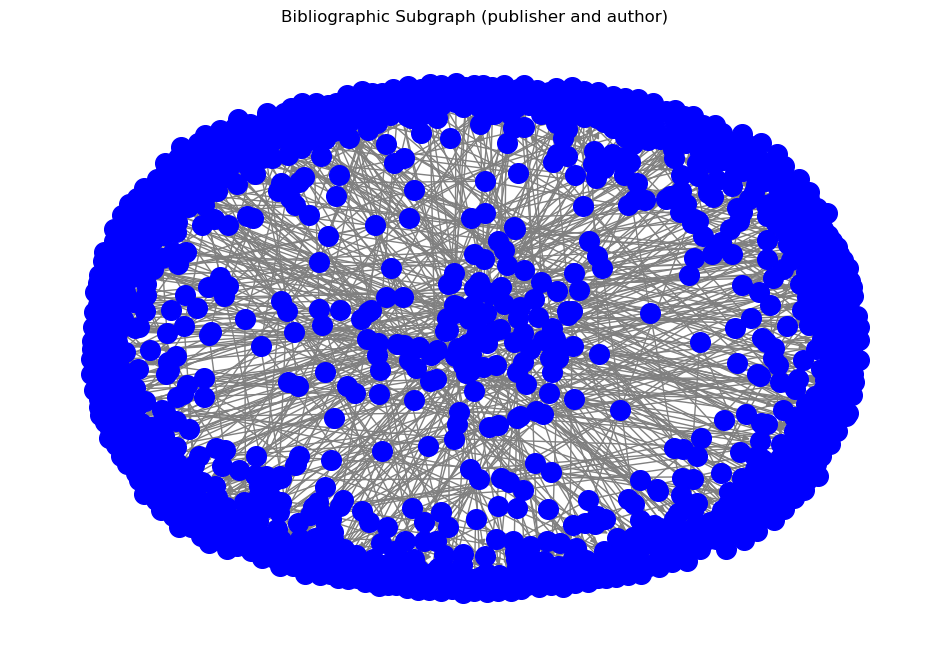

In [8]:
# Add nodes to the graph
for _, row in data_author.iterrows():
    publisher = row['Publisher']
    author = row['Author']

    # Add paper title as a node
    graph.add_node(publisher)

    # Add citation as a node
    graph.add_node(author)

    # Add edge between paper title and citation
    graph.add_edge(publisher, author)

# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos, with_labels=False, node_size=200, font_size=10, edge_color='gray', node_color='blue')  # Change node_color to 'blue'
plt.title('Bibliographic Subgraph (publisher and author)')
plt.axis('off')
plt.show()

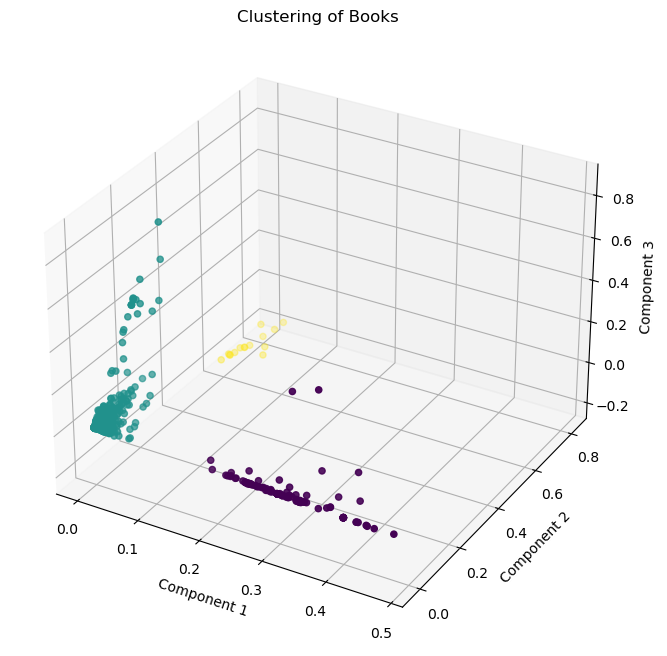

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plot functionality

# Extract node features (number of topics or papers)
node_features = np.array([len(graph[node]) for node in graph.nodes()]).reshape(-1, 1)

# Remove rows with NaN or null values
df.dropna(inplace=True)

# Select relevant features for clustering (e.g., abstracts)
data = df['Title'].tolist()

# Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Reduce dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Plot the clusters in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=labels, cmap='viridis')
ax.set_title('Clustering of Books')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

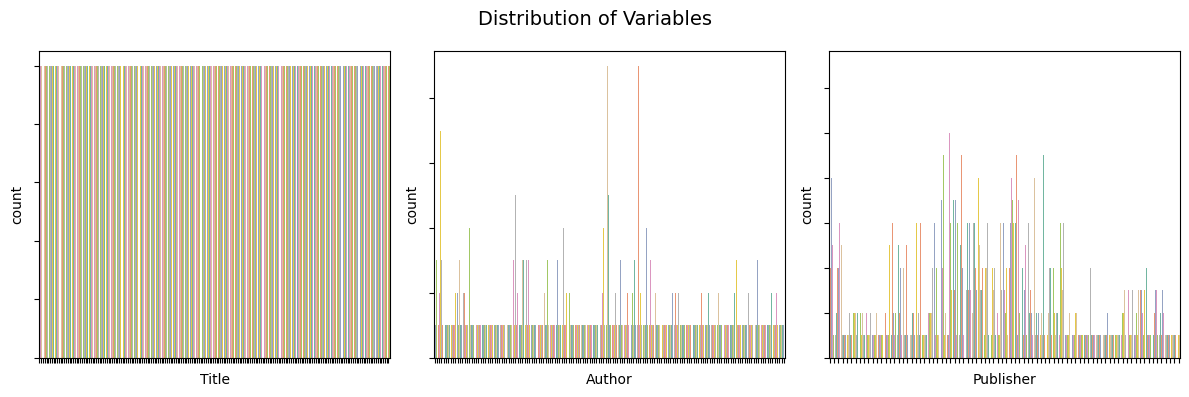

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to evaluate health on
columns_to_evaluate = ['Title', 'Author', 'Publisher']

# Specify the desired color palette
color_palette = 'Set2'  # Change this to the desired palette name

fig, axes = plt.subplots(1, len(columns_to_evaluate), figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(columns_to_evaluate):
    g = sns.countplot(x=col, data=df, ax=axes[i], palette=color_palette)
    if len(df[col].unique()) > 5:
        g.set_xticks(range(0, len(df[col].unique()), 5))
        g.set_xticklabels([])  # Remove x-axis labels

    g.set_yticklabels([])  # Remove y-axis labels

plt.subplots_adjust(wspace=0.3)  # Adjust spacing between subplots

plt.suptitle('Distribution of Variables', fontsize=14)
plt.tight_layout()
plt.show()